# Домашна задача 3 - Ана Каренина
## Виртуелни општества 2018/2019
### Андреј Јанчевски - 151003

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.colors import ListedColormap
import networkx as nx
import sys
sys.path.append('using_networkx')
from community_jolleycraig import detect_communities, split_communities, new_draw_nodes

In [2]:
ak_graph = nx.read_gml("using_networkx/anna.gml")
num_nodes=ak_graph.number_of_nodes()
num_edges=ak_graph.number_of_edges()
num_nodes, num_edges

(138, 493)

In [3]:
ak_graph.nodes

NodeView(('AA', 'AG', 'AL', 'AN', 'AO', 'AP', 'BA', 'BD', 'BE', 'BL', 'BN', 'BO', 'BT', 'CA', 'CB', 'CD', 'CN', 'CO', 'CV', 'DO', 'ED', 'EF', 'FC', 'FR', 'FY', 'GA', 'GO', 'GR', 'GV', 'HA', 'HO', 'IG', 'IV', 'IW', 'JL', 'KA', 'KE', 'KI', 'KO', 'KP', 'KR', 'KT', 'KU', 'KV', 'KY', 'KZ', 'LE', 'LI', 'LK', 'LL', 'LM', 'LP', 'LV', 'MA', 'MB', 'MC', 'MD', 'ME', 'MH', 'MI', 'MJ', 'MK', 'ML', 'MM', 'MN', 'MO', 'MP', 'MQ', 'MR', 'MS', 'MT', 'MV', 'MX', 'MY', 'MZ', 'NA', 'ND', 'NI', 'NL', 'NN', 'NS', 'NT', 'NV', 'NY', 'PA', 'PC', 'PD', 'PE', 'PH', 'PK', 'PO', 'PP', 'PR', 'PS', 'PT', 'PV', 'PX', 'PY', 'RT', 'RY', 'SA', 'SE', 'SH', 'SI', 'SL', 'SM', 'SN', 'SO', 'SP', 'SQ', 'SS', 'ST', 'SU', 'SV', 'SY', 'TA', 'TB', 'TC', 'TT', 'TU', 'TV', 'VA', 'VE', 'VF', 'VG', 'VI', 'VK', 'VO', 'VP', 'VR', 'VS', 'VV', 'VY', 'XV', 'YG', 'YK', 'YS', 'YV'))

In [4]:
def plot_graph(top_central_nodes=10):
    centralities = nx.degree_centrality(ak_graph)
    top = list(centralities.items())
    top = sorted(top, key=lambda x: x[1], reverse=True)
    top = [node for node, centrality in top[:top_central_nodes]]
    print(top)
    ak_top_graph = nx.Graph()
    for node in top:
        ak_top_graph.add_node(node, desc=ak_graph.nodes[node]["desc"])
    for i in range(0, top_central_nodes):
        for j in range(i + 1, top_central_nodes):
            pair = tuple(sorted((top[i], top[j])))
            if pair in list(ak_graph.edges):
                ak_top_graph.add_edge(
                    pair[0], pair[1], value=ak_graph.edges[pair]["value"])

    node_label_mapping = dict(
        [(node, ak_top_graph.nodes[node]["desc"].split(", ")[0])
         for node in list(ak_top_graph.nodes)])
    ak_top_graph = nx.relabel_nodes(ak_top_graph, node_label_mapping)
    node_positions = nx.drawing.layout.spring_layout(
        ak_top_graph, seed=57, iterations=5000, k=10)
    edge_weights = list(nx.get_edge_attributes(ak_top_graph, "value").values())
    node_cmap = edge_cmap = plt.get_cmap("cool")
    edge_colors = edge_weights
    min_edge_weight = min(edge_weights)
    max_edge_weight = max(edge_weights)
    edge_widths = [
        9 * (weight - min_edge_weight) / (max_edge_weight - min_edge_weight) +
        1 for weight in edge_weights
    ]

    plt.figure(1, (16, 9), dpi=int(1920 / 16))
    nx.draw_networkx_nodes(
        ak_top_graph,
        pos=node_positions,
        node_size=500,
        node_color=((0, 0.5, 1, 1), ),
        cmap=node_cmap)
    nx.draw_networkx_labels(ak_top_graph, pos=node_positions, font_size=8)
    nx.draw_networkx_edges(
        ak_top_graph,
        pos=node_positions,
        width=edge_widths,
        edge_color=edge_colors,
        alpha=0.5,
        edge_cmap=edge_cmap)
    plt.title(
        "Anna Karenina Graph - Top " + str(top_central_nodes) + " Central",
        fontsize=12)
    plt.axis('off')
    plt.show()

['LE', 'ST', 'VR', 'KI', 'AN', 'DO', 'KO', 'PR', 'AL', 'PS']


C:\Users\bani5\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


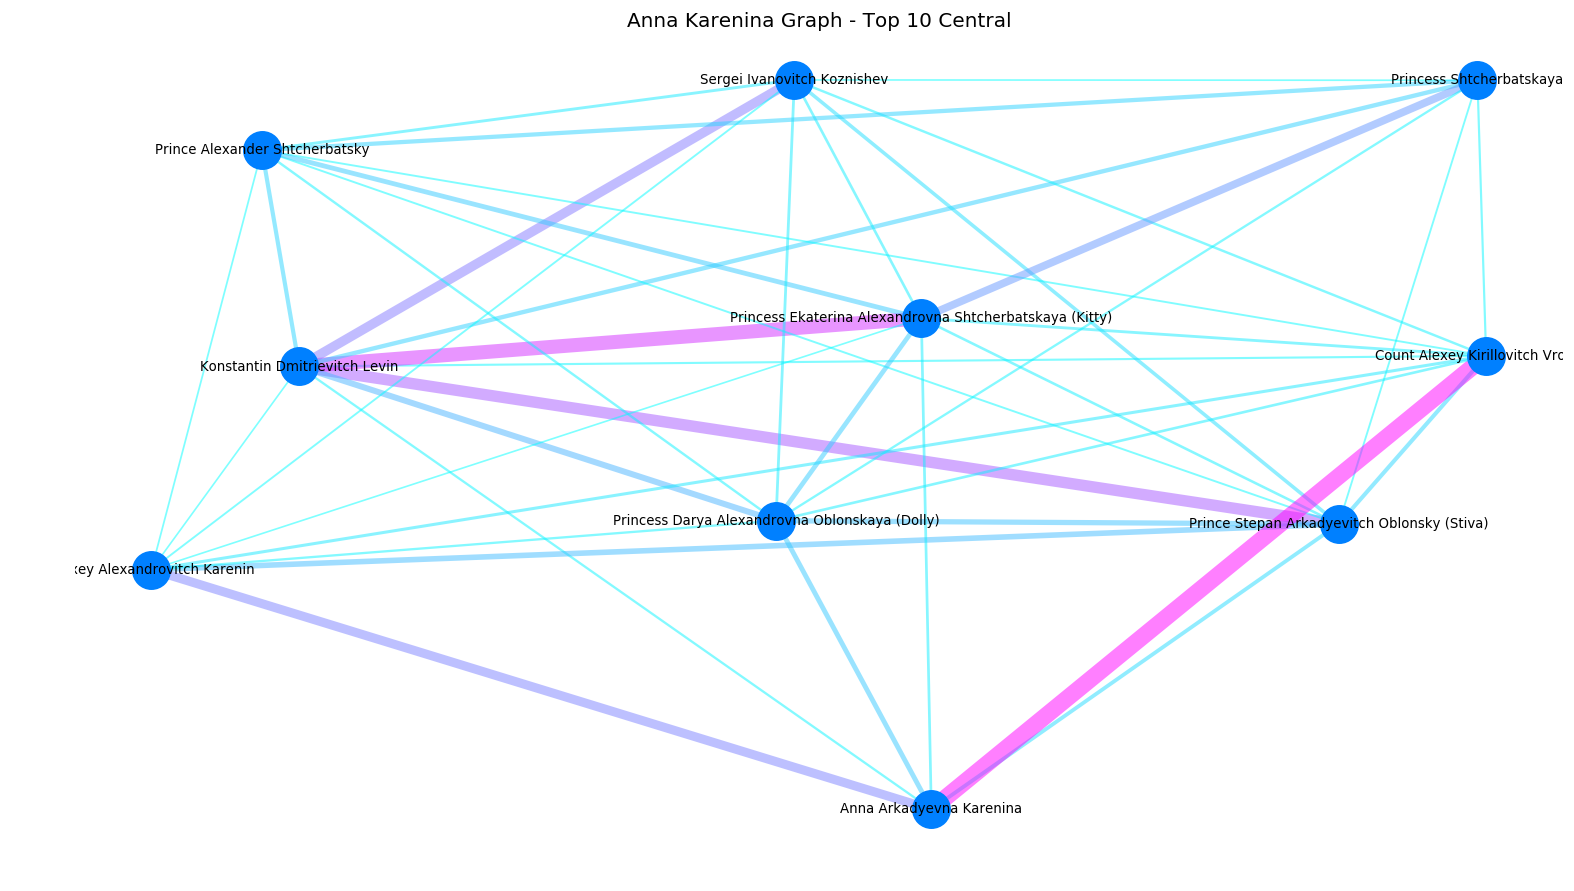

In [5]:
plot_graph(top_central_nodes=10)

['LE', 'ST', 'VR', 'KI', 'AN', 'DO', 'KO', 'PR', 'AL', 'PS', 'GR', 'SV', 'TV', 'VK', 'TA', 'VV', 'KE', 'YV', 'BT', 'TU', 'AG', 'KV', 'MA', 'KT', 'PE', 'SE', 'YS', 'SM', 'CN', 'PT']


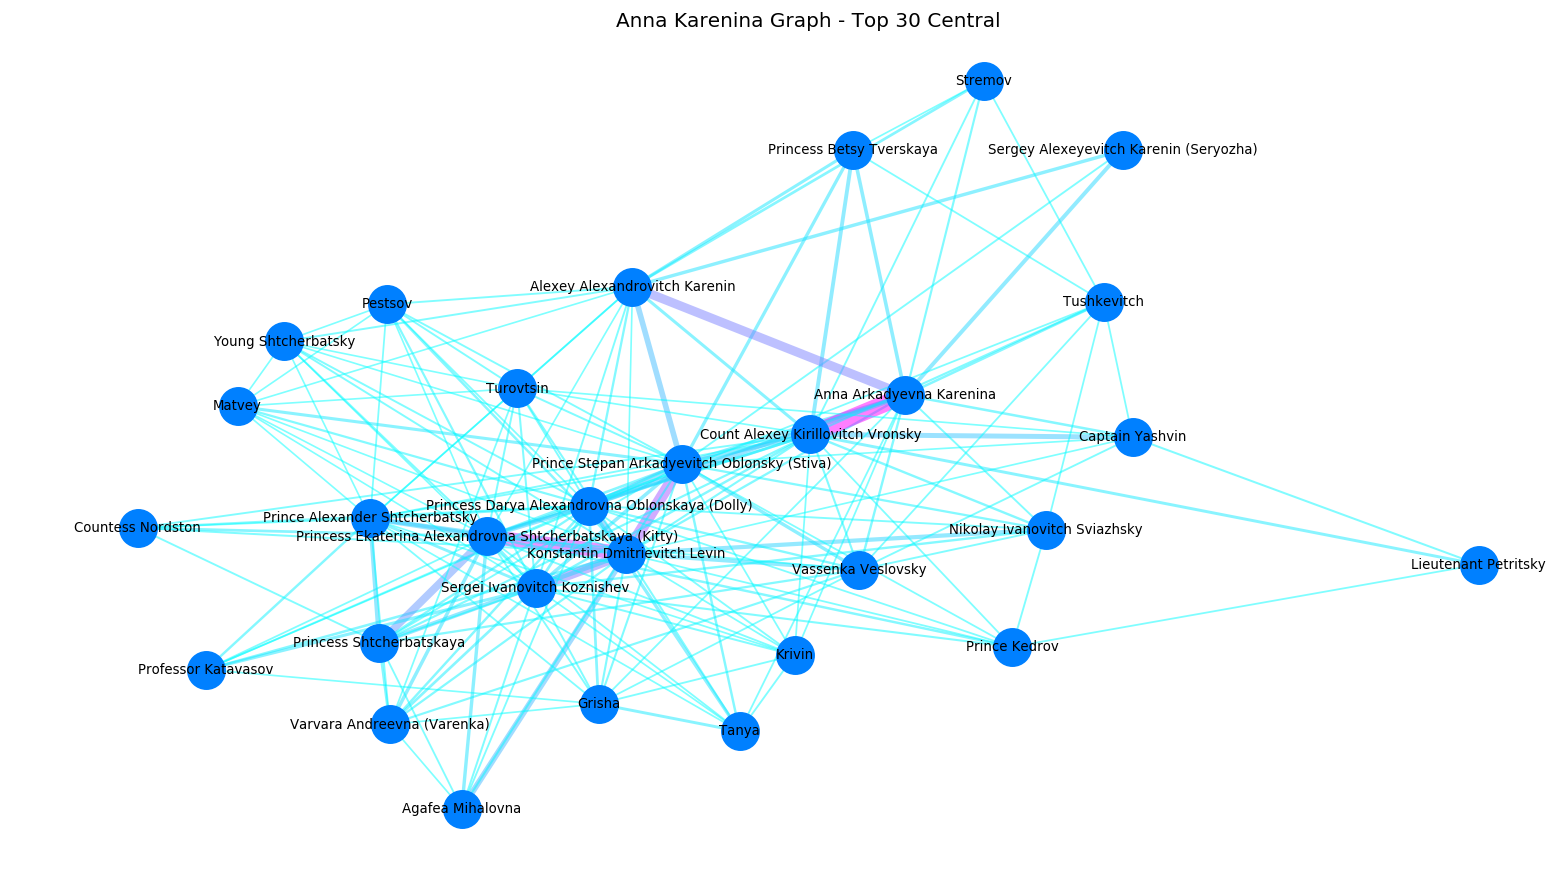

In [6]:
plot_graph(top_central_nodes=30)

In [7]:
edge_weights = nx.get_edge_attributes(ak_graph, "value")
edge_weights = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
edge_weights[0]

(('AN', 'VR'), 27.2)

In [8]:
node_list = list(ak_graph.nodes)
edge_list = list(ak_graph.edges)
stop = False
for i in range(0, num_nodes):
    for j in range(i + 1, num_nodes):
        pair = tuple(sorted((node_list[i], node_list[j])))
        if not pair in edge_list:
            print(pair)
            stop = True
            break
    if stop:
        break

('AA', 'AG')


In [9]:
split_communities(ak_graph)
coms = set(ak_graph.node[n]['Community'] for n in ak_graph.nodes())
print('Communities:', coms)
colors = [x for x in mcolors.CSS4_COLORS.values()]
color_seq = np.random.choice(colors, len(coms)).tolist()

ak_graph_color_dict, ak_graph_pos = new_draw_nodes(
    ak_graph,
    cls_attr='Community',
    prog='fdp',
    color_seq=color_seq,
    with_labels=True,
    show=True,
    use_graphviz=False)

KeyError: 0

In [14]:
sorted_nodes = sorted(
    ak_graph.nodes(data=True), key=lambda x: x[1]['Community'])
dim = len(sorted_nodes)
matrix = np.zeros((dim, dim))
for i in range(dim):
    for j in range(i + 1, dim):
        if ak_graph.has_edge(sorted_nodes[i][0], sorted_nodes[j][0]):
            if sorted_nodes[i][1]['Community'] != sorted_nodes[j][1][
                    'Community']:
                matrix[i][j] = matrix[j][i] = 1
            else:
                matrix[i][j] = matrix[j][
                    i] = sorted_nodes[i][1]['Community'] + 2

cmap = ListedColormap(['whitesmoke'] + ['navy'] + color_seq)
plt.figure(1, figsize=(9, 9), dpi=1080 / 9)
plt.title("Ana Karenina Interaction Matrix")
plt.matshow(matrix, cmap=cmap)
plt.show()

KeyError: 'Community'